## TITLE: West Central East Gauge Plots

**Purpose:** 

**Dependencies:** 

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pygmt

In [2]:
def plot_single_gauge(name, gauge_num, width_df, depth_df, locs, wd):
    plottools = '/home/catherinej/BarrierBreach/visualization/plottools/'
    import yaml
    with open("/home/catherinej/claw_code/src/claw_code/post/gmt_config.yml", "r") as ymlfile:
        cfg = yaml.safe_load(ymlfile)
    fig = pygmt.Figure()
    fig.basemap(region=cfg['xy_region'],
                projection = 'X5c/4c',
                frame = ['ya.5f.125+l"Sea Surface (m)"',
                         'xa2f1+l"Hours from landfall"',
                         f'+t"Gauge {gauge_num}"'])
    with pygmt.config(MAP_FRAME_TYPE='inside'):
        fig.basemap(region=cfg['xy_region'], 
                    projection='X5c/4c',
                    frame=['yf1','xf1'])
        
        ## modify this to plot just the mean of each
        ## make another function to plot all of each?
        
        fig.plot(x=depth_df.index, y=depth_df.values,
                    pen='faint,blue', )
        fig.plot(x=wd.index, y=wd.values, pen='faint,green')

        fig.plot(x=locs.index, y=locs.values,
                    pen='faint,red', )
        fig.plot(x=width_df.index, y=width_df.values, 
                   pen='faint,orange,')
    
    
    
    # for idx, col in enumerate(no_breach):
    #     if col == 'no_breach':
    #         pen='faint,black,--'
    #     else:
    #         pen='faint,gray,-'
    #     fig.plot(x=no_breach.index, y=no_breach[col], pen=pen)
        
    # fig.shift_origin(xshift='7c')
    fig.legend(position='JBM+o-.75c/-1.20c', 
               box=True, )
               # spec=os.path.join(plottools, f'{name}_gauge_legend.txt'))
    return fig

In [4]:
x = {'data': wd,
         'weight': wd_weights,
         'color': 	'#D55E00',
         'name': 'vary both'}
y = {'data': width,
     'weight': wweights,
     'color': '#009E73',
     'name': 'vary width'}
z = {'data': depth,
     'weight': dweights,
     'color': '#56B4E9',
     'name': 'vary depth'}
k = {'data': rall,
     'weight': rweights,
     'color': '#CC79A7',
     'name': 'vary all'}

NameError: name 'wd' is not defined

In [5]:
def plot_gauge_subplots(data, savepath, cfg, fig, i):
    with fig.set_panel(panel=i):

        # fig.basemap(region=cfg['xy_region'],
        #             projection = 'X5c/4c',
        #             frame = ['ya.5f.125+l"Sea Surface (m)"',
        #                      'xa2f1+l"Hours from landfall"',
        #                      f'+t"Gauge {data["num"]}"'])
        # with pygmt.config(MAP_FRAME_TYPE='inside'):
        #     fig.basemap(region=cfg['xy_region'], 
        #                 projection='X5c/4c',
        #                 frame=['yf1','xf1'])

            fig.plot(x=data['w'].index, y=data['w'].values, pen='#009E73')
            fig.plot(x=data['d'].index, y=data['d'].values, pen='#56B4E9')
            fig.plot(x=data['wd'].index, y=data['wd'].values, pen='#D55E00')
            fig.plot(x=data['l'].index, y=data['l'].values, pen='#CC79A7')

                    
    # fig.show()
    # fig.savefig(savepath)
                        

In [6]:
def get_columns_mean(df):
    loc_cols = [col for col in df if 'loc' in col]
    wcols = [col for col in df if 'd' not in col and 'w' in col]
    dcols = [col for col in df if 'w' not in col and 'd' in col]
    wd_cols = [col for col in df if 'dw' in col]

    w = df[wcols].mean(axis=1)
    d = df[dcols].mean(axis=1)
    dw = df[wd_cols].mean(axis=1)
    loc = df[loc_cols].mean(axis=1)
    nob = df['no_breach']
    return w, d, loc, dw, nob

def gmt_panel_setup():
    import yaml
    with open("/home/catherinej/claw_code/src/claw_code/post/gmt_config.yml", "r") as ymlfile:
        cfg = yaml.safe_load(ymlfile)
    fig = pygmt.Figure()
    with fig.subplot(nrows=1, ncols=3, figsize=('30c', '15c'), frame='lrtb',
                    autolabel='+jTL+o3.65c/0.5c+gwhite', sharex='b', sharey='l', margins='-2.75/0.75'):
        return fig

In [11]:
# def get_columns(df):
#     loc_cols = [col for col in df if 'loc' in col]
#     wcols = [col for col in df if 'd' not in col and 'w' in col]
#     dcols = [col for col in df if 'w' not in col and 'd' in col]
#     wd_cols = [col for col in df if 'wd' in col]
#[84, 82, 133, 45, 11, 119]
PATH = '/home/catherinej/BarrierBreach/data/'
gauges = {'west': [84, 82],
          'central': [45, 133],
          'east': [11, 119]}
# files = []
# for loc in gauges:
#     # fig = gmt_panel_setup()
#     nums = gauges[loc]
#     for idx, n in enumerate(nums):
#         no_breach = pd.read_pickle(os.path.join(PATH, f'gauge1{n:04}.pkl.gz'))['no_breach']
#         # no_breach.to_csv(f'~/BreachPaper/BarrierBreachPaper/data/no_breach_gauge{n:04}_{loc}.csv')
#         files.append(f'/home/catherinej/BarrierBreach/data/{loc}_gauge1{n:04}.pkl.gz')
#         # df = pd.read_pickle(os.path.join(PATH, f'{loc}_gauge1{n:04}.pkl.gz'))
#         # w, d, l, wd = get_columns(df)
# plot_dataframes(files)
#         # Plot w, d, l, wd on the same axis
        # w[(w.index > -2.0) & (w.index < 2.0)].to_csv(f'~/BreachPaper/BarrierBreachPaper/data/width_gauge{n:04}_{loc}.csv')
        # w[(d.index > -2.0) & (d.index < 2.0)].to_csv(f'~/BreachPaper/BarrierBreachPaper/data/depth_gauge{n:04}_{loc}.csv')
        # w[(l.index > -2.0) & (l.index < 2.0)].to_csv(f'~/BreachPaper/BarrierBreachPaper/data/loc_gauge{n:04}_{loc}.csv')
        # w[(wd.index > -2.0) & (wd.index < 2.0)].to_csv(f'~/BreachPaper/BarrierBreachPaper/data/wd_gauge{n:04}_{loc}.csv')
        
    #     data = {'title': loc,
    #             'w': w,
    #             'd': d,
    #             'l': l,
    #             'wd': wd,
    #             'no_breach': no_breach,
    #             'num': n}
    #     savepath = f'/home/catherinej/BarrierBreach/visualization/{n}_{loc}.png'
    #     plot_gauge_subplots(data, savepath, cfg, fig, idx)
    # fig.show()
    # savefile = f'bay_{g}.png'
    # fig.savefig(os.path.join('/home/catherinej/BarrierBreach/visualization/', savefile))

In [8]:
import matplotlib.pyplot as plt
plt.style.use('./mystyle.mplstyle')
def plot_files(filenames):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), sharex=True, sharey=True)
    for i, filename in enumerate(filenames):
        loc = list(gauges.keys())[i // 3]  # determine location for subplot label
        row = i % 3  # determine row for subplot
        col = i // 3  # determine column for subplot
        ax = axs[row, col]  # get axis for current subplot
        nums = gauges[loc]
        for n in nums:
            with pd.read_pickle(filename) as df:
                subdf = df[df['number'] == n]
                w, d, l, wd = get_columns(subdf)
                # plot data for current number
                ax.plot(w, d, label=f'{n}')
                ax.set_title(f'{loc.upper()} {chr(ord("a")+row*3+col)}')
                ax.set_xlabel('Width')
                ax.set_ylabel('Depth')
                ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


In [9]:
import matplotlib as mpl
# mpl.use('pgf')

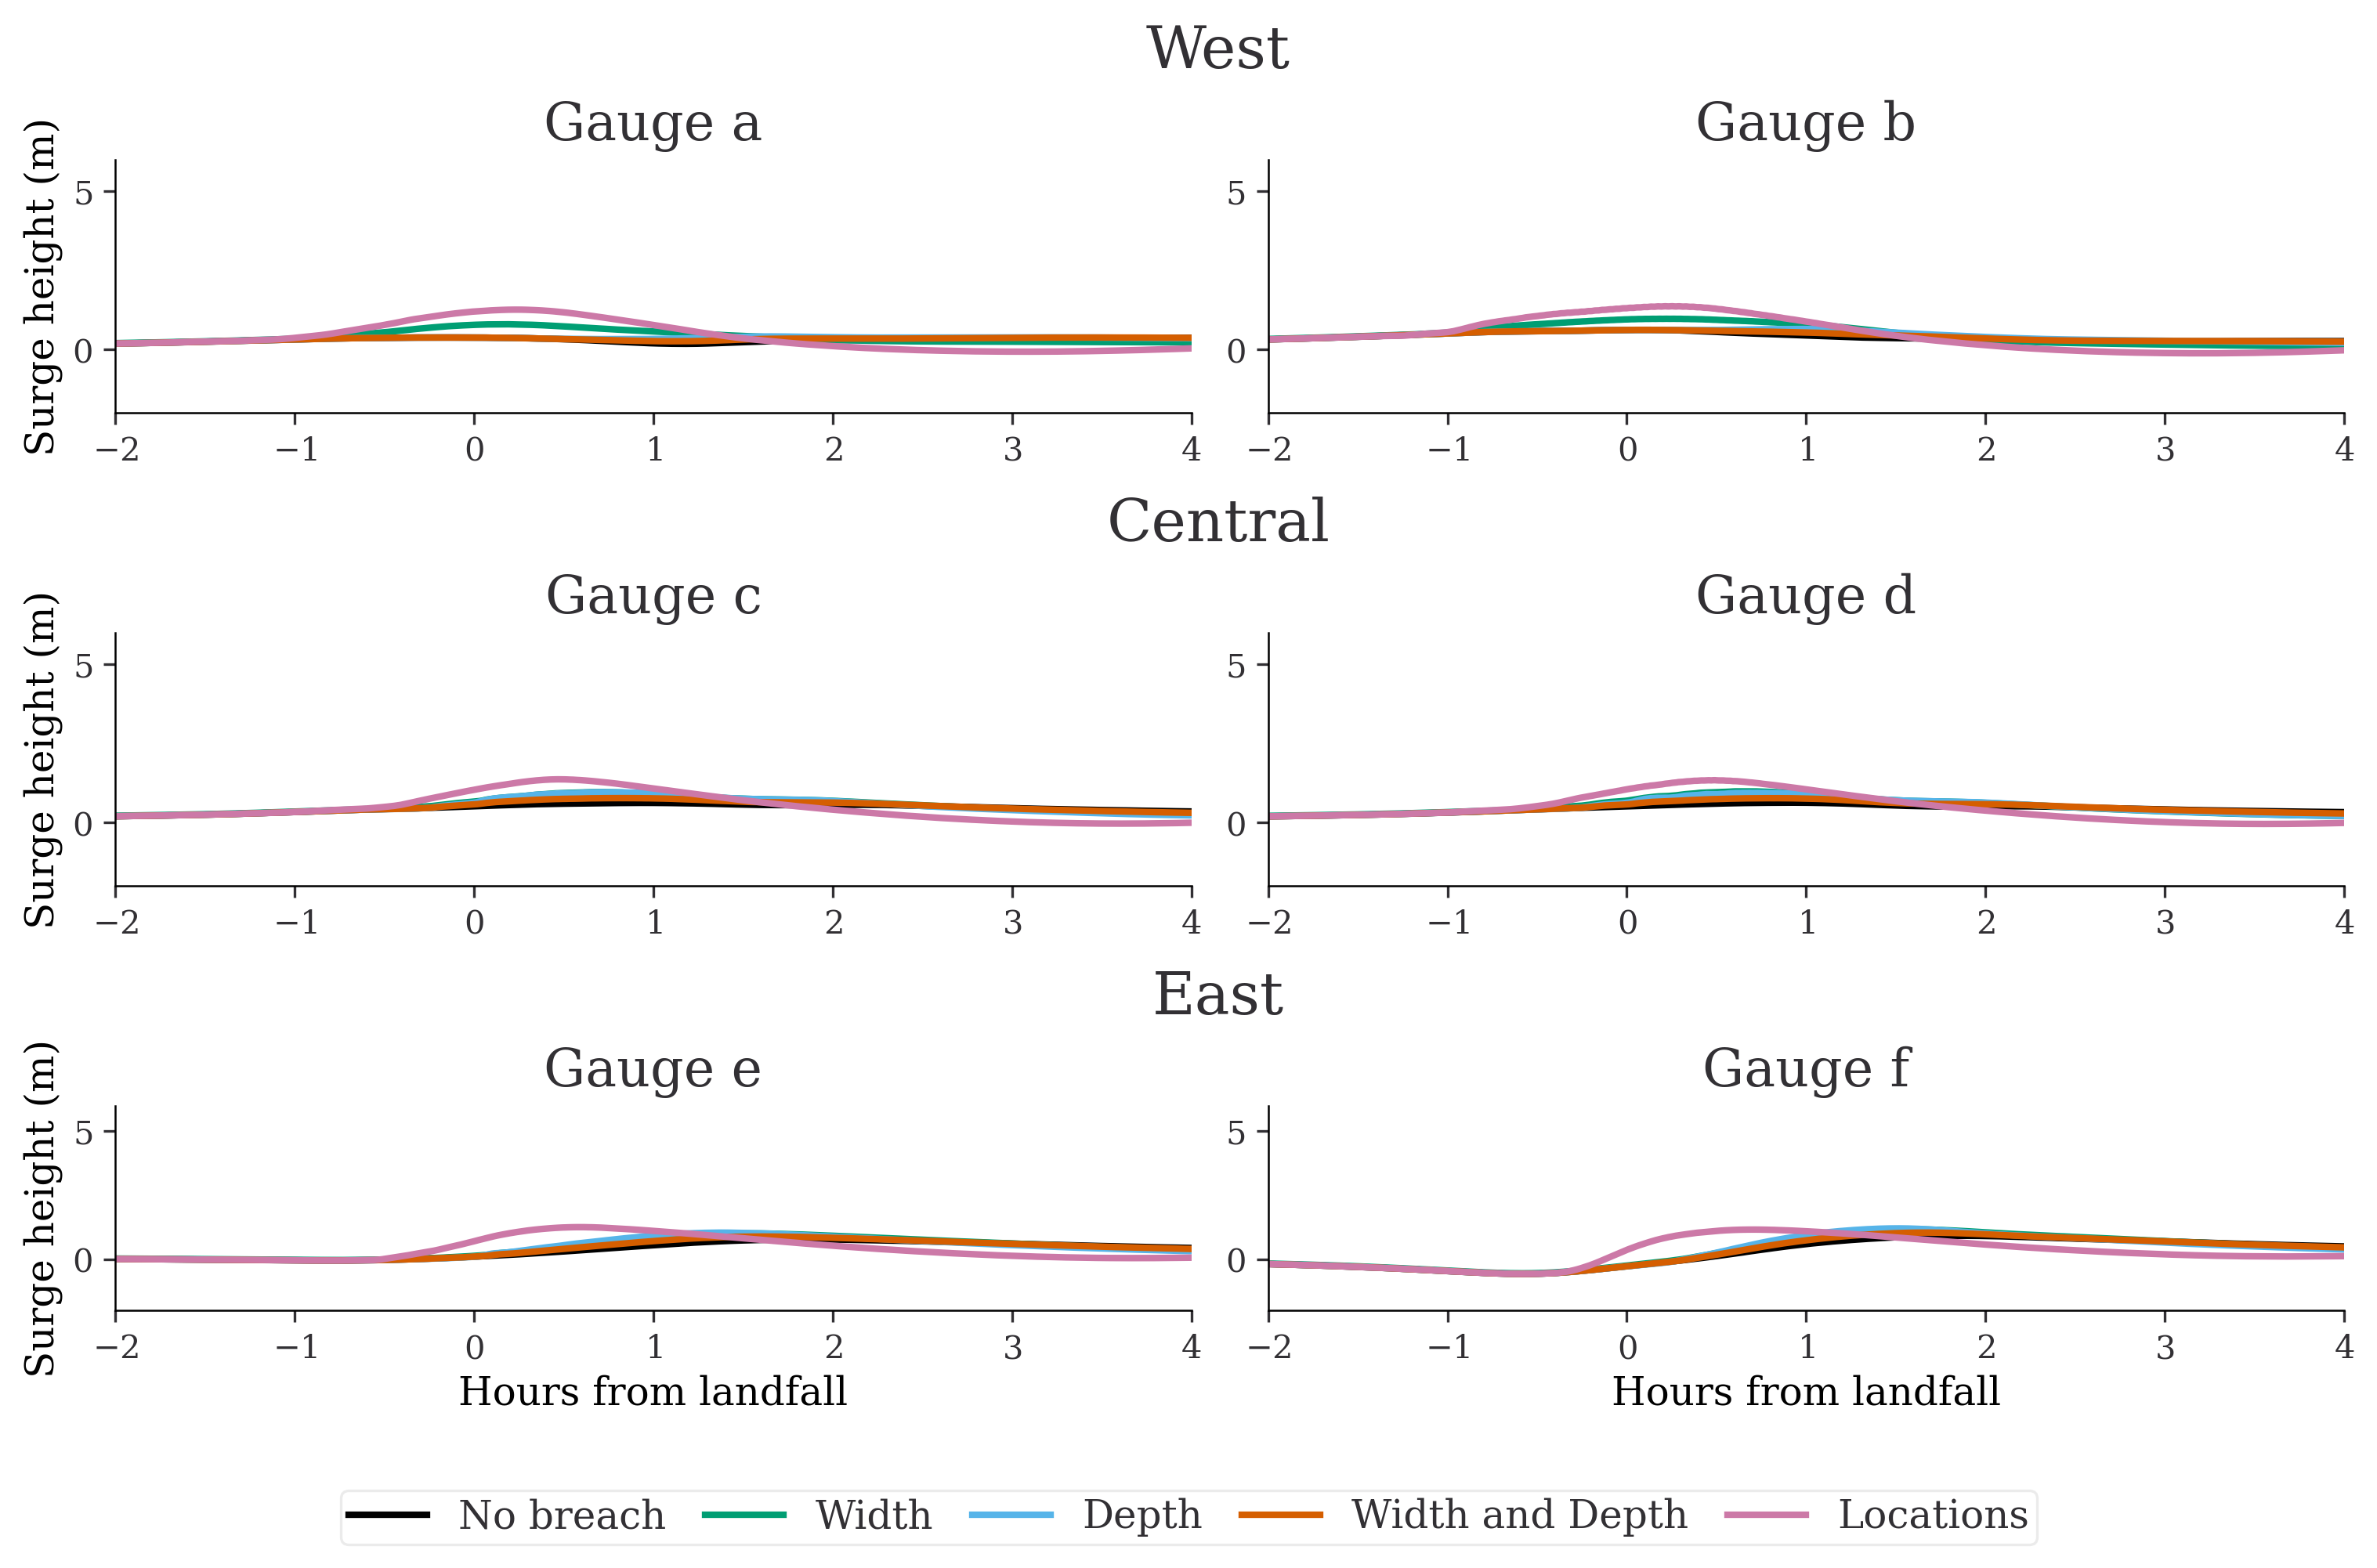

<Figure size 1920x1440 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

plt.style.use('./mystyle.mplstyle')

# Define the figure and subplots
# fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig = plt.figure(constrained_layout=True,figsize=(10,6))

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
letters = ['a', 'b', 'c', 'd', 'e', 'f']
# Loop through each location/gauge number
for i, (loc, nums) in enumerate(gauges.items()):
    
    axs = subfigs[i].subplots(nrows=1, ncols=2)
    mid = (fig.subplotpars.right + fig.subplotpars.left)/2
    subfigs[i].suptitle(f'{loc.capitalize()}', x=mid)
    for j, n in enumerate(nums):
        # Load the data for this location/gauge number
        df = pd.read_pickle(os.path.join(PATH, f'{loc}_gauge1{n:04}.pkl.gz'))
        df = df.loc[:,~df.columns.duplicated()].copy()
        # Get the columns for each category
        w, d, l, wd, nob = get_columns_mean(df)
        
        # Define the categories
        categories = {'nob':
                     {'name': 'No breach',
                     'data': nob,
                     'color': 'black'},
                    'width':
                      {'name': 'Width',
                      'data': w,
                      'color': '#009E73'},
                      'depth':
                      {'name': 'Depth',
                       'data': d,
                       'color': '#56B4E9'},
                      'wd':
                      {'name': 'Width and Depth',
                       'data': wd,
                       'color': '#D55E00'},
                      'loc': 
                      {'name': 'Locations',
                       'data': l,
                       'color': '#CC79A7'},
                      }
                                         
        # Plot each category on the same axis
        ax = axs[j]
        
        for cat in categories:
            if categories[cat]['name'] == 'no breach':
                ax.plot(df.index, categories[cat]['data'], label=categories[cat]['name'], color=categories[cat]['color'], linestyle='--')
            else:
                ax.plot(df.index, categories[cat]['data'], label=categories[cat]['name'], color=categories[cat]['color'])
            

        # Add legend and subplot labels
        ax.set_title(f'Gauge {letters[i*2 + j]}')
        # ax.legend(loc='upper left')
        ax.set_xlim(-2,4)
        if i == 2:
            ax.set_xlabel('Hours from landfall')
        if j == 0:
            ax.set_ylabel('Surge height (m)')
    # axs[i, 0].annotate('Test_row', xy=(0.5, 1), xytext=(0, 10), ha='center', textcoords='offset points', fontsize=12, weight='bold')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0,-0.1,1,0.25),  ncol=5, fontsize=12)  

# fig.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#                 mode="expand")
plt.show()
plt.savefig('/home/catherinej/BreachPaper/BarrierBreachPaper/figures/fig4_v2.pgf', format='pgf', bbox_inches='tight')
# plt.savefig(f'/home/catherinej/BarrierBreach/visualization/west_central_east_surge.pgf', format='pgf', bbox_inches='tight')


In [12]:
import os
print(os.getcwd())

/home/catherinej/BarrierBreach/src/barrierbreach/visualization


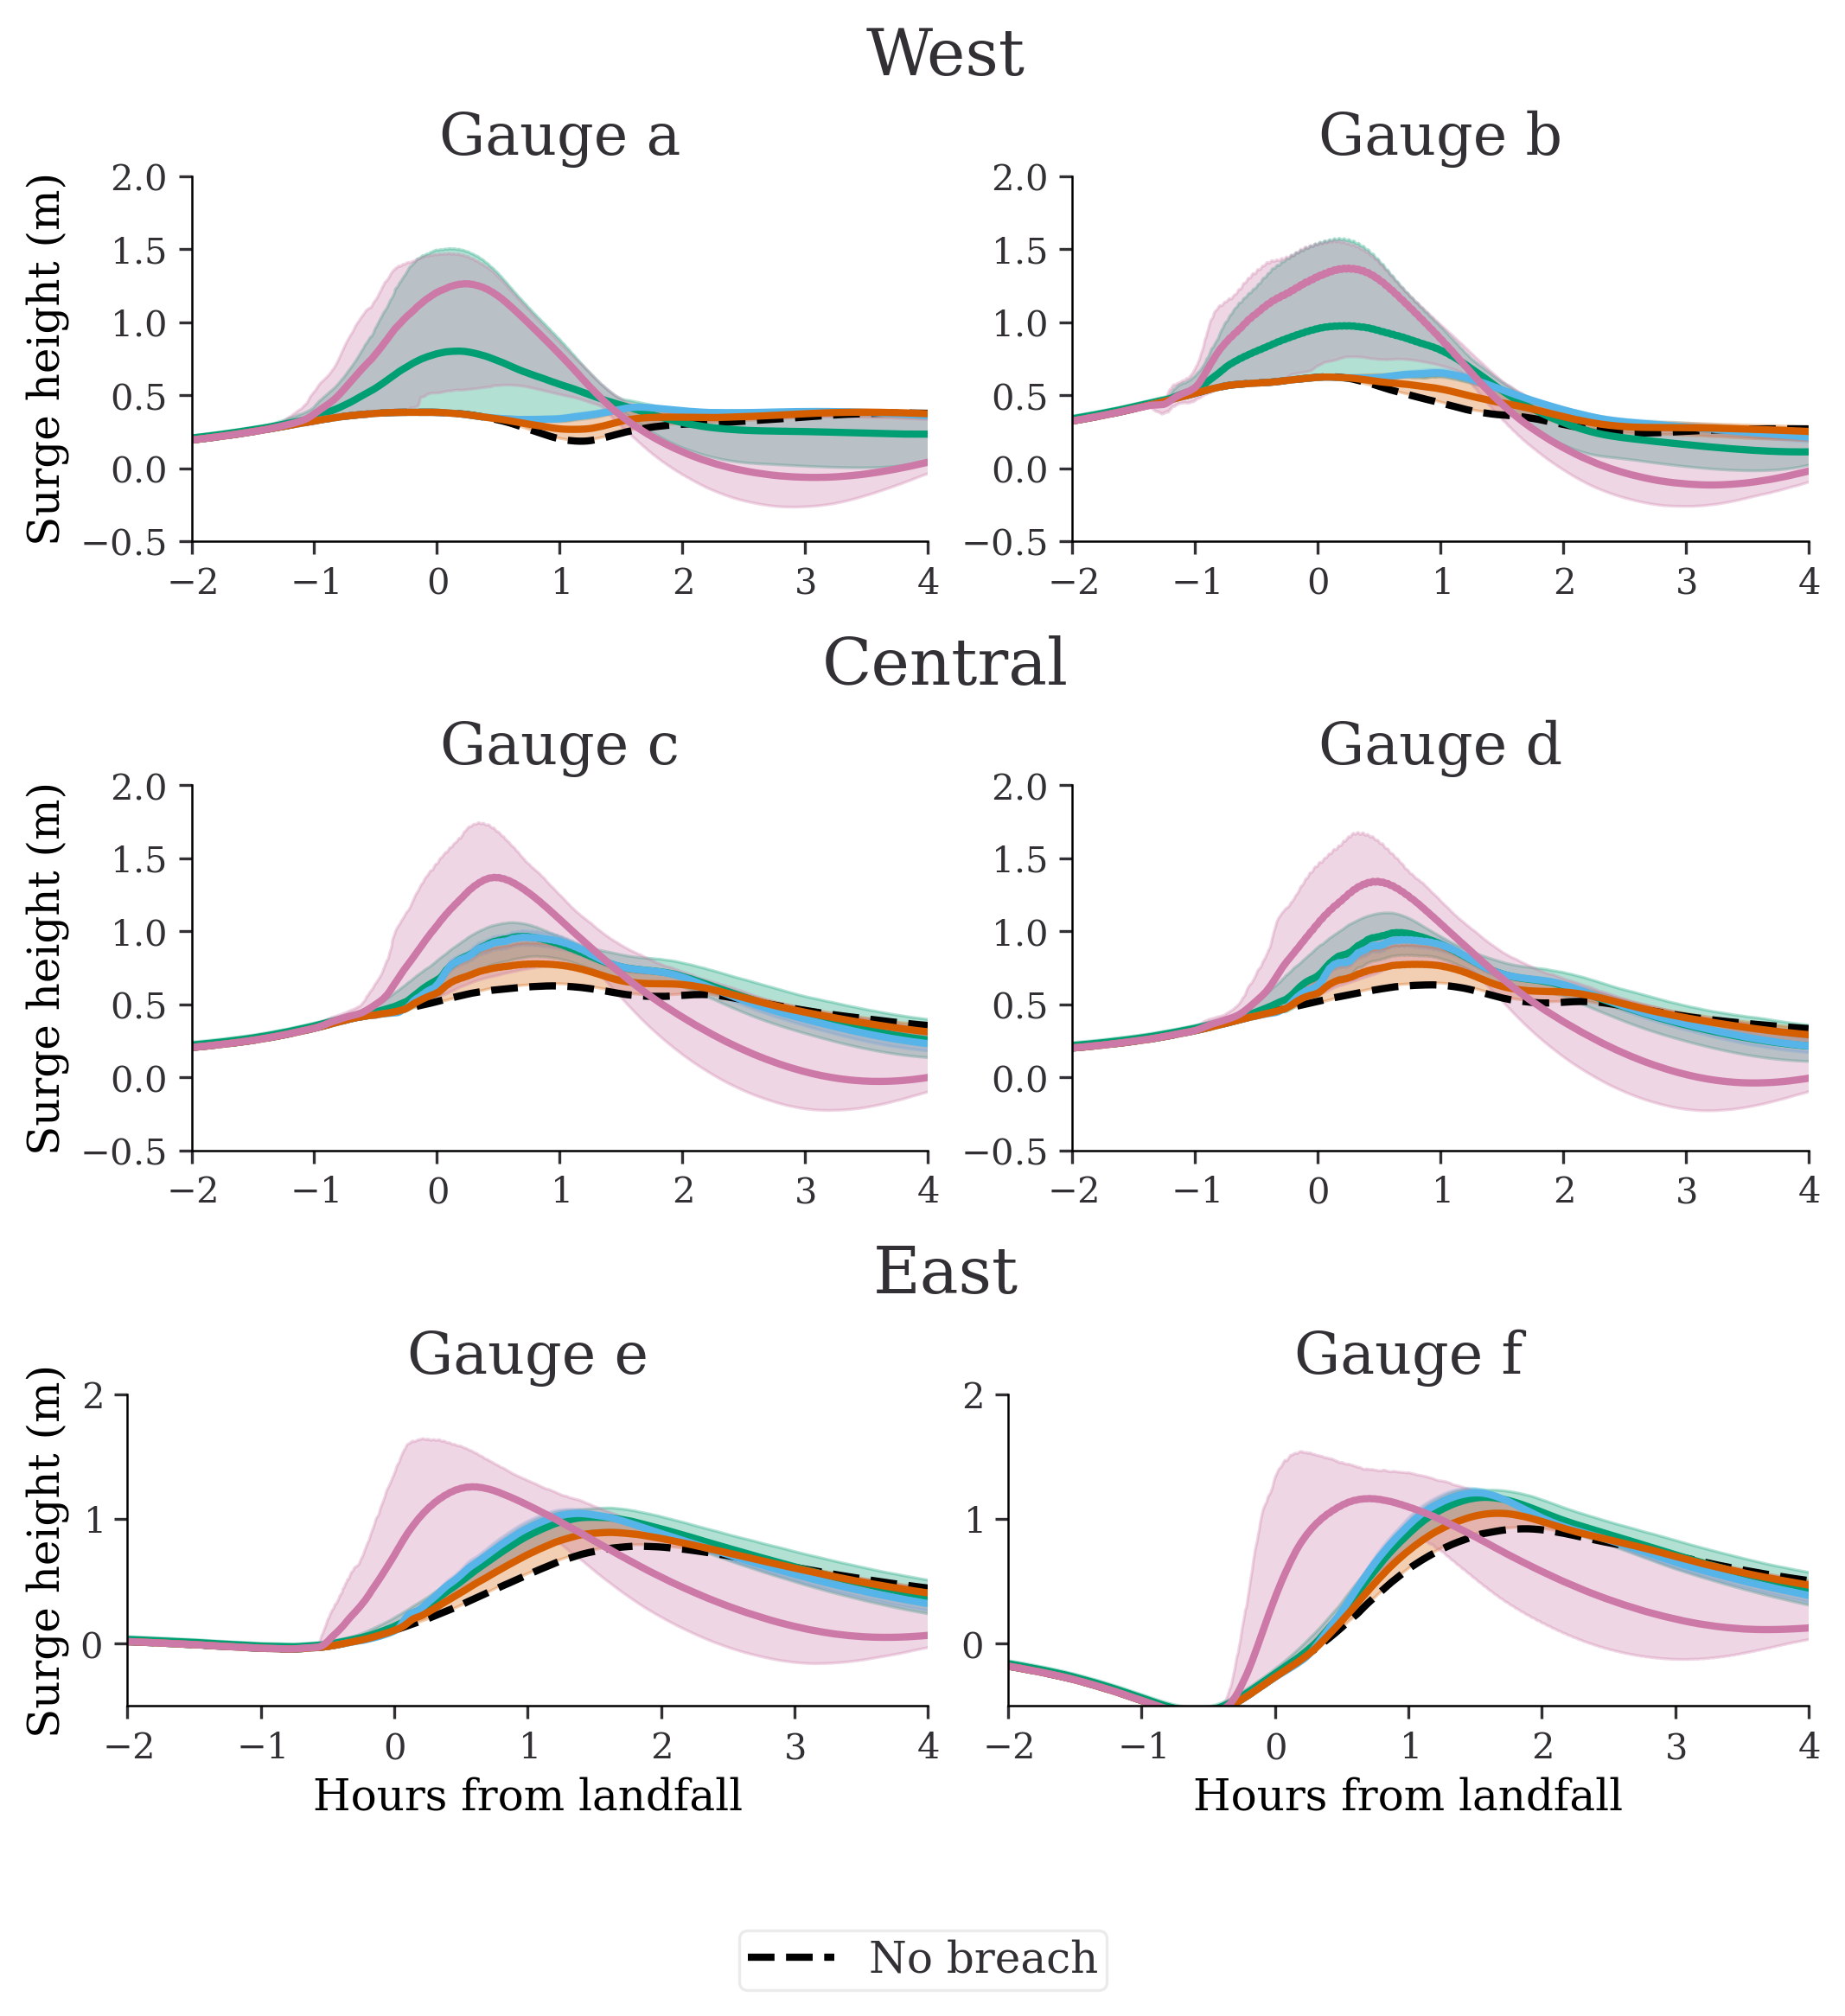

In [14]:

def get_columns(df):
    loc_cols = [col for col in df if 'loc' in col]
    wcols = [col for col in df if 'd' not in col and 'w' in col]
    dcols = [col for col in df if 'w' not in col and 'd' in col]
    wd_cols = [col for col in df if 'dw' in col]

    w = df[wcols]
    d = df[dcols]
    dw = df[wd_cols]
    loc = df[loc_cols]
    nob = df['no_breach']
    return w, d, loc, dw, nob

def calc_perc(df, min_per=.05, max_per=.95):
    # Calculate the mean, 5th, and 95th percentiles
    mean_values = df.mean(axis=1)
    percentile_5 = df.quantile(min_per, axis=1)
    percentile_95 = df.quantile(max_per, axis=1)
    return mean_values, percentile_5, percentile_95


plt.style.use('./mystyle.mplstyle')

# Define the figure and subplots
# fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig = plt.figure(constrained_layout=True,figsize=(7,7))

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
# Define a list of letters from 'a' to 'f'
letters = ['a', 'b', 'c', 'd', 'e', 'f']
# Loop through each location/gauge number
for i, (loc, nums) in enumerate(gauges.items()):
    
    axs = subfigs[i].subplots(nrows=1, ncols=2)
    mid = (fig.subplotpars.right + fig.subplotpars.left)/2
    subfigs[i].suptitle(f'{loc.capitalize()}', x=mid)
    for j, n in enumerate(nums):
        # Load the data for this location/gauge number
        df = pd.read_pickle(os.path.join(PATH, f'{loc}_gauge1{n:04}.pkl.gz'))
        df = df.loc[:,~df.columns.duplicated()].copy()
        # Get the columns for each category
        w, d, l, wd, nob = get_columns(df)
        
        # Define the categories
        categories = {'nob':
                     {'name': 'No breach',
                     'data': nob,
                     'color': 'black'},
                    'width':
                      {'name': 'Width',
                      'data': w,
                      'color': '#009E73'},
                      'depth':
                      {'name': 'Depth',
                       'data': d,
                       'color': '#56B4E9'},
                      'wd':
                      {'name': 'Width and Depth',
                       'data': wd,
                       'color': '#D55E00'},
                      'loc': 
                      {'name': 'Locations',
                       'data': l,
                       'color': '#CC79A7'},
                      }
                                         
        # Plot each category on the same axis
        ax = axs[j]
        
        for cat in categories:
            
            if categories[cat]['name'] == 'No breach':
                ax.plot(df.index, categories[cat]['data'], label=categories[cat]['name'], color=categories[cat]['color'], linestyle='--')
            else:
                mean, minp, maxp = calc_perc(categories[cat]['data'])
                ax.plot(df.index, mean, color=categories[cat]['color'])
                ax.fill_between(df.index, minp, maxp, color=categories[cat]['color'], alpha=0.3)

        # Add legend and subplot labels
        ax.set_title(f'Gauge {letters[i*2 + j]}')
        # ax.legend(loc='upper left')
        ax.set_xlim(-2,4)
        ax.set_ylim(-0.5, 2.0)
        if i == 2:
            ax.set_xlabel('Hours from landfall')
        if j == 0:
            ax.set_ylabel('Surge height (m)')
            # Get the legend handles and labels for each subplot
handles, labels = ax.get_legend_handles_labels()

    # axs[i, 0].annotate('Test_row', xy=(0.5, 1), xytext=(0, 10), ha='center', textcoords='offset points', fontsize=12, weight='bold')
    
# handles, labels = plt.gca.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0,-0.1,1,0.25),  ncol=5, fontsize=12)  

# fig.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#                 mode="expand")
plt.show()
# plt.savefig('/home/catherinej/BreachPaper/BarrierBreachPaper/figures/fig4_v2.pdf',bbox_inches='tight')
# plt.savefig(f'/home/catherinej/BarrierBreach/visualization/west_central_east_surge.pgf', format='pgf', bbox_inches='tight')


In [15]:
# Loop through each location/gauge number
for i, (loc, nums) in enumerate(gauges.items()):
    for j, n in enumerate(nums):
        # Load the data for this location/gauge number
        df = pd.read_pickle(os.path.join(PATH, f'{loc}_gauge1{n:04}.pkl.gz'))
        print('yes' if 'no_breach' in df.columns else 'no')
        # Get the columns for each category
        w, d, l, wd, nob = get_columns(df)
        print(f'for {loc}, gauge {n}\n')
        print('Width maxes \n', w.loc[w == w.max()])
        print('Depth maxes \n', d.loc[d == d.max()])
        print('both maxes \n', wd.loc[wd == wd.max()])
        print('loc maxes \n', l.loc[l == l.max()], '\n')

yes
for west, gauge 84



ValueError: Cannot index with multidimensional key

In [25]:
len(w.columns)

455

In [ ]:
# (Previous code...)

# Define the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Define a list of letters from 'a' to 'f'
letters = ['a', 'b', 'c', 'd', 'e', 'f']

# Loop through each location/gauge number
for i, (loc, nums) in enumerate(gauges.items()):
    # Define the subfigure axis (row and column index)
    row_index = i // 2
    col_index = i % 2

    # Define the subfigure title
    axs[row_index, col_index].set_title(f'{loc.capitalize()}')

    for j, n in enumerate(nums):
        # Load the data for this location/gauge number
        df = pd.read_pickle(os.path.join(PATH, f'{loc}_gauge1{n:04}.pkl.gz'))
        df = df.loc[:, ~df.columns.duplicated()].copy()
        # Get the columns for each category
        w, d, l, wd, nob = get_columns(df)

        # Define the categories
        categories = {'nob':
                     {'name': 'No breach',
                     'data': nob,
                     'color': 'black'},
                    'width':
                      {'name': 'Width',
                      'data': w,
                      'color': '#009E73'},
                      'depth':
                      {'name': 'Depth',
                       'data': d,
                       'color': '#56B4E9'},
                      'wd':
                      {'name': 'Width and Depth',
                       'data': wd,
                       'color': '#D55E00'},
                      'loc': 
                      {'name': 'Locations',
                       'data': l,
                       'color': '#CC79A7'},
                      }
                                         
        # Plot each category on its own axis
        ax = axs[row_index, col_index]

        for cat in categories:
            if categories[cat]['name'] == 'No breach':
                ax.plot(df.index, categories[cat]['data'], label=categories[cat]['name'], color=categories[cat]['color'], linestyle='--')
            else:
                tsplot(df.index, categories[cat]['data'].values.T, ax, color=categories[cat]['color'])

        # Add subplot labels
        ax.set_title(f'Gauge {letters[i*2 + j]}')
        ax.set_xlim(-2, 4)
        if i == 2:
            ax.set_xlabel('Hours from landfall')
        if j == 0:
            ax.set_ylabel('Surge height (m)')

# Add legend for the last subplot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0, -0.1, 1, 0.25), ncol=5, fontsize=12)

plt.tight_layout()  # Optional: Adjust the spacing between subplots for better appearance
plt.show()


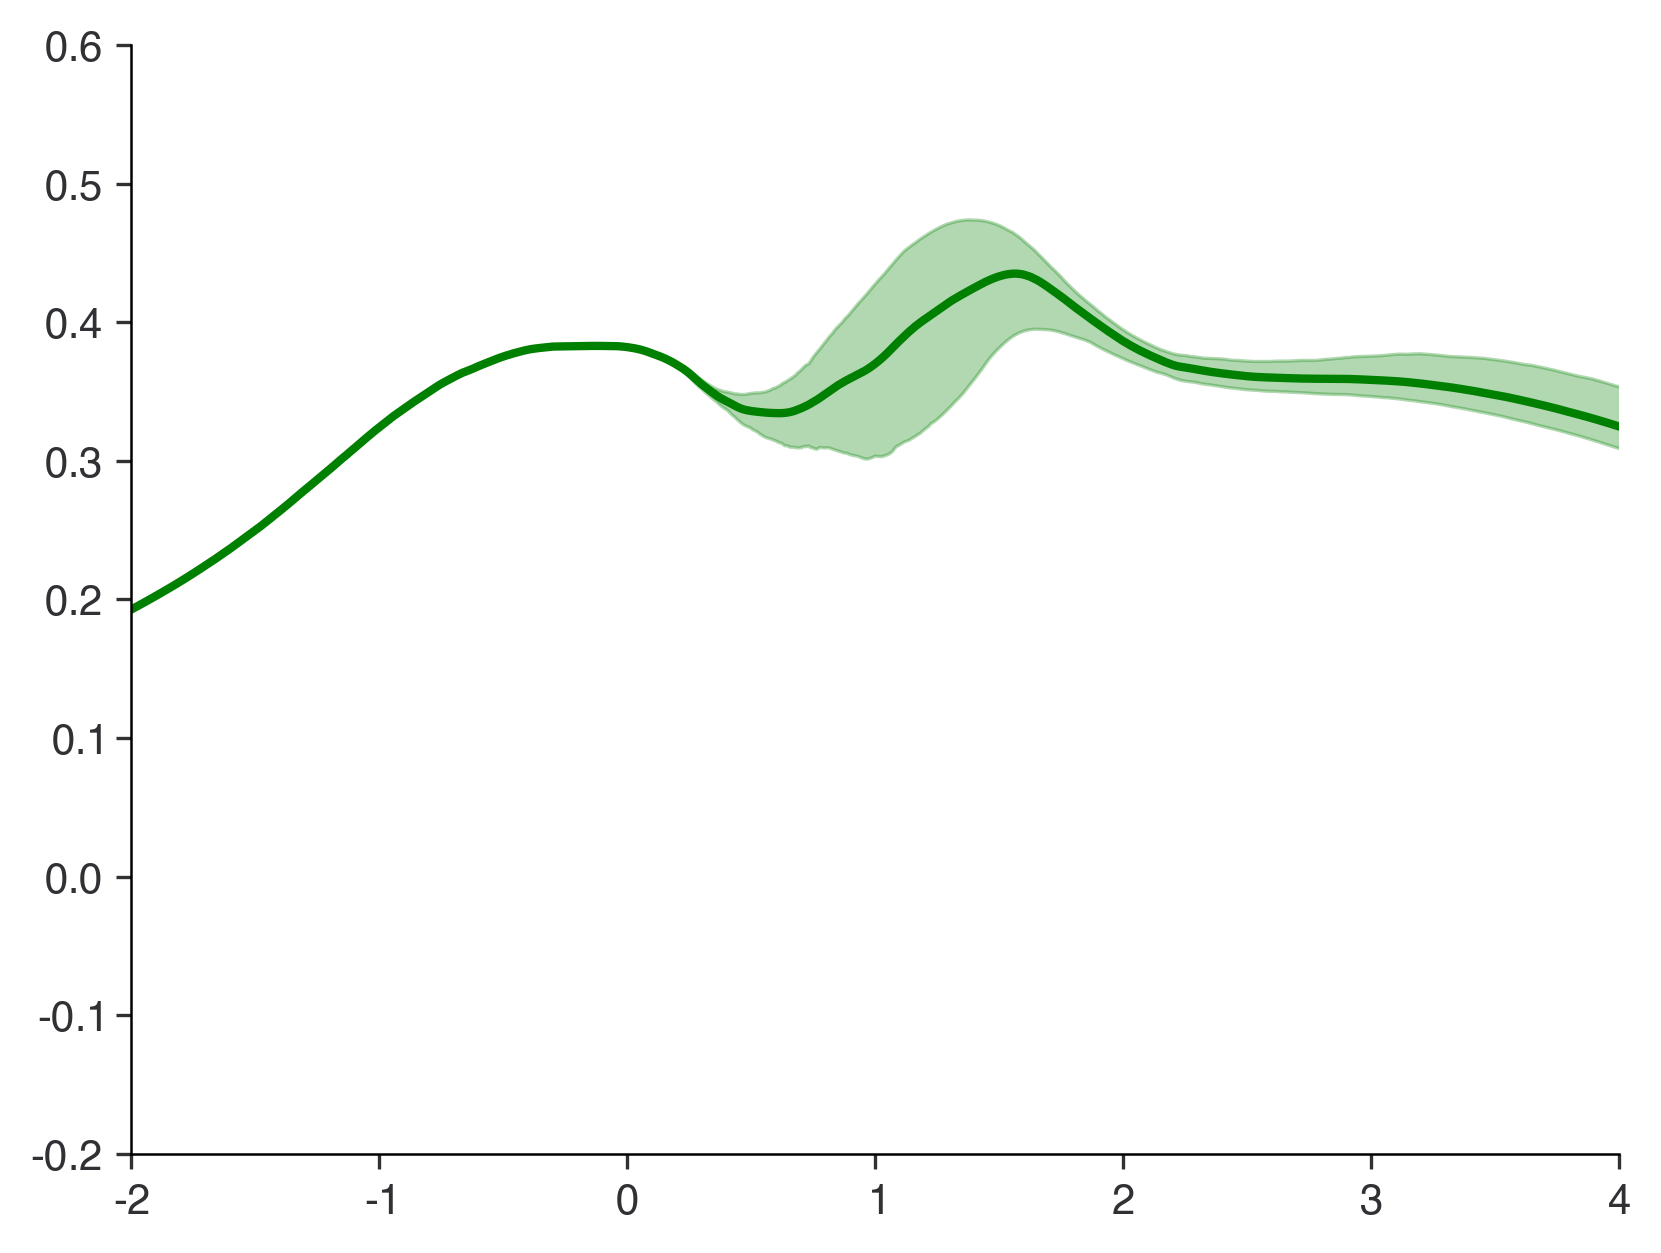

In [53]:
# calculate the lower and upper percentile groups, skipping 50 percentile
perc1 = np.percentile(y, np.linspace(5, 50, num=1, endpoint=False), axis=0)
perc2 = np.percentile(y, np.linspace(50, 95, num=2)[1:], axis=0)

# if 'alpha' in kwargs:
#     alpha = kwargs.pop('alpha')
# else:
#     alpha = 1/n
# fill lower and upper percentile groups
fig = plt.figure()
for p1, p2 in zip(perc1, perc2):
    plt.fill_between(x, p1, p2,  alpha=.3, color='green')#, edgecolor=None)
    # ax.plot(x, p2, alpha=.3, color=color, linestyle='dotted')#, edgecolor=None)

plt.plot(x, np.mean(y, axis=0), color='green')
plt.xlim(-2,4)
plt.show()

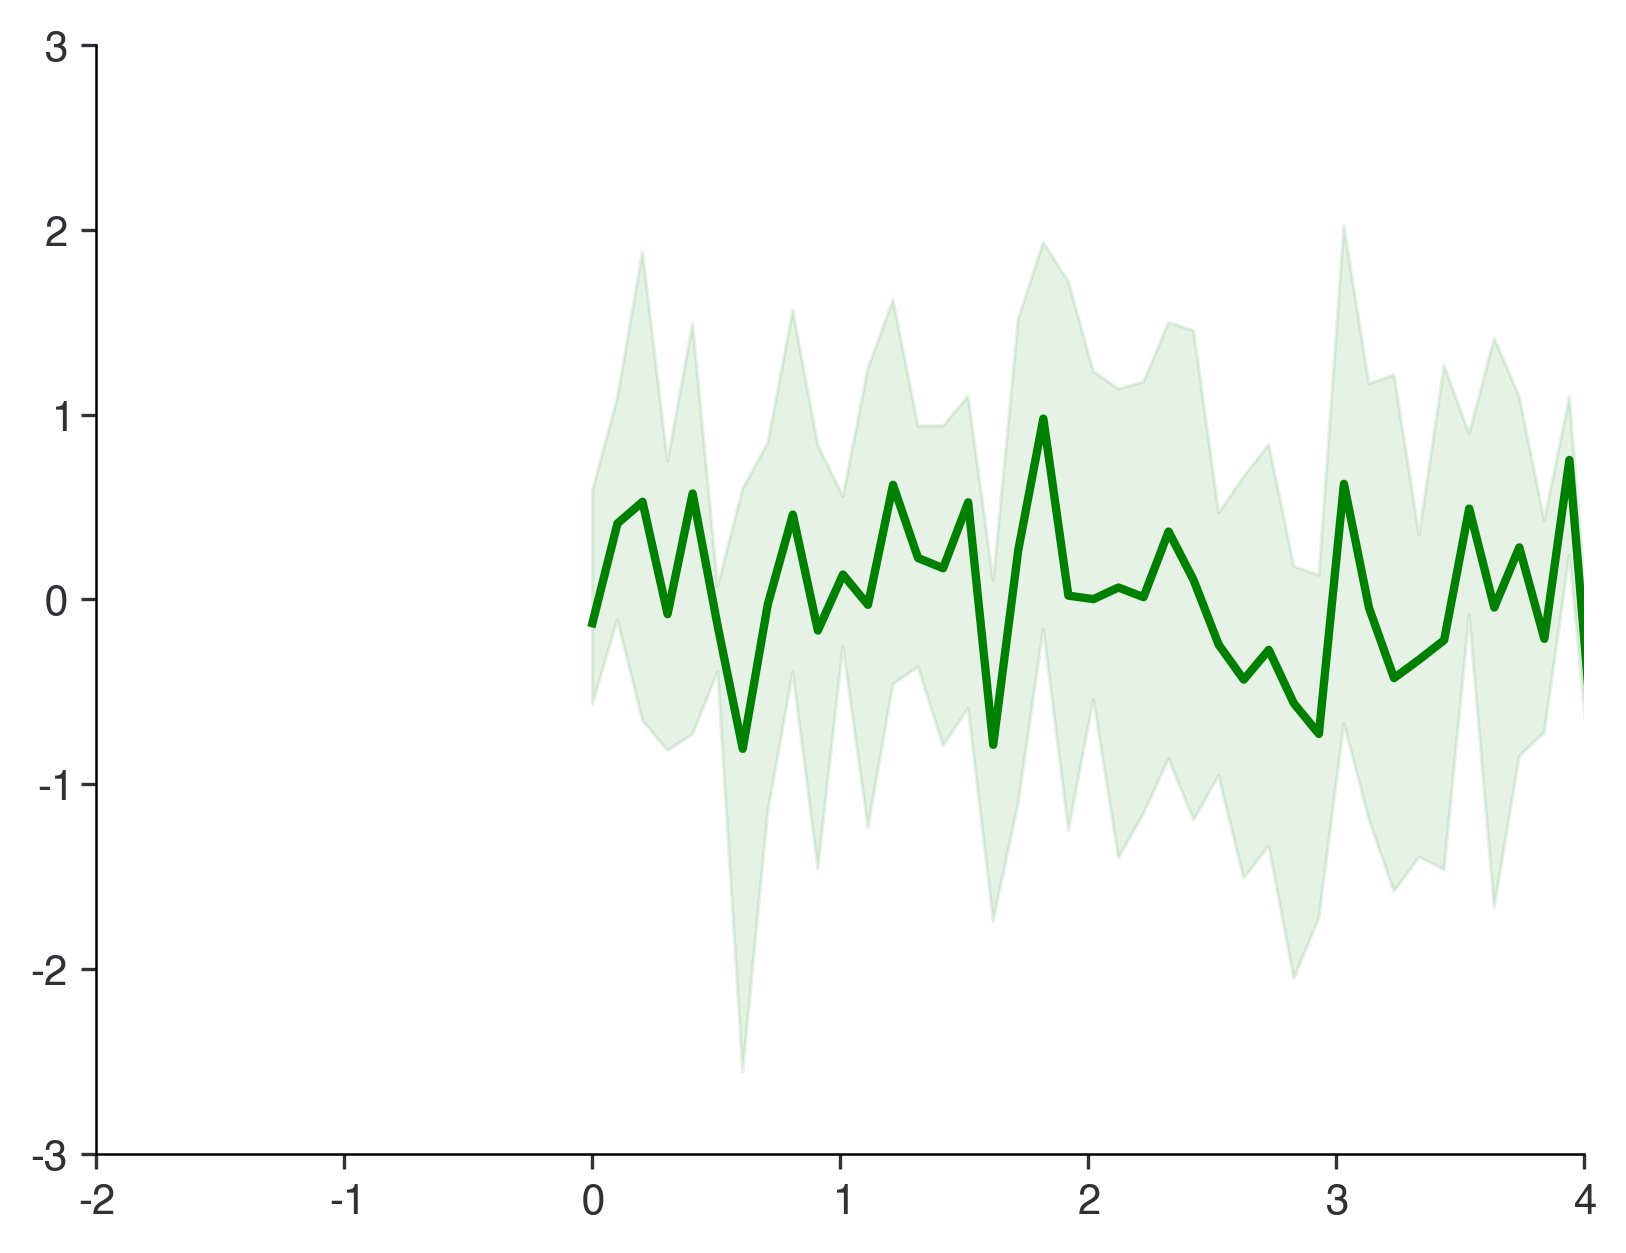

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.linspace(0, 10, 100)
y = np.random.normal(loc=0, scale=1, size=(5, 100))  # Sample data with shape (5, 100)

# Calculate the lower and upper percentile groups, skipping 50 percentile
n = 20  # Increase the number of percentiles
perc1 = np.percentile(y, np.linspace(5, 50, num=1, endpoint=False), axis=0)
perc2 = np.percentile(y, np.linspace(50, 95, num=1 + 1)[1:], axis=0)

# Customize alpha value
alpha = 0.1  # Reduce alpha to make the shaded regions more transparent

# Fill lower and upper percentile groups
fig = plt.figure()
for p1, p2 in zip(perc1, perc2):
    plt.fill_between(x, p1, p2, alpha=alpha, color='green')

# Plot the mean line
plt.plot(x, np.mean(y, axis=0), color='green')

plt.xlim(-2, 4)
plt.show()


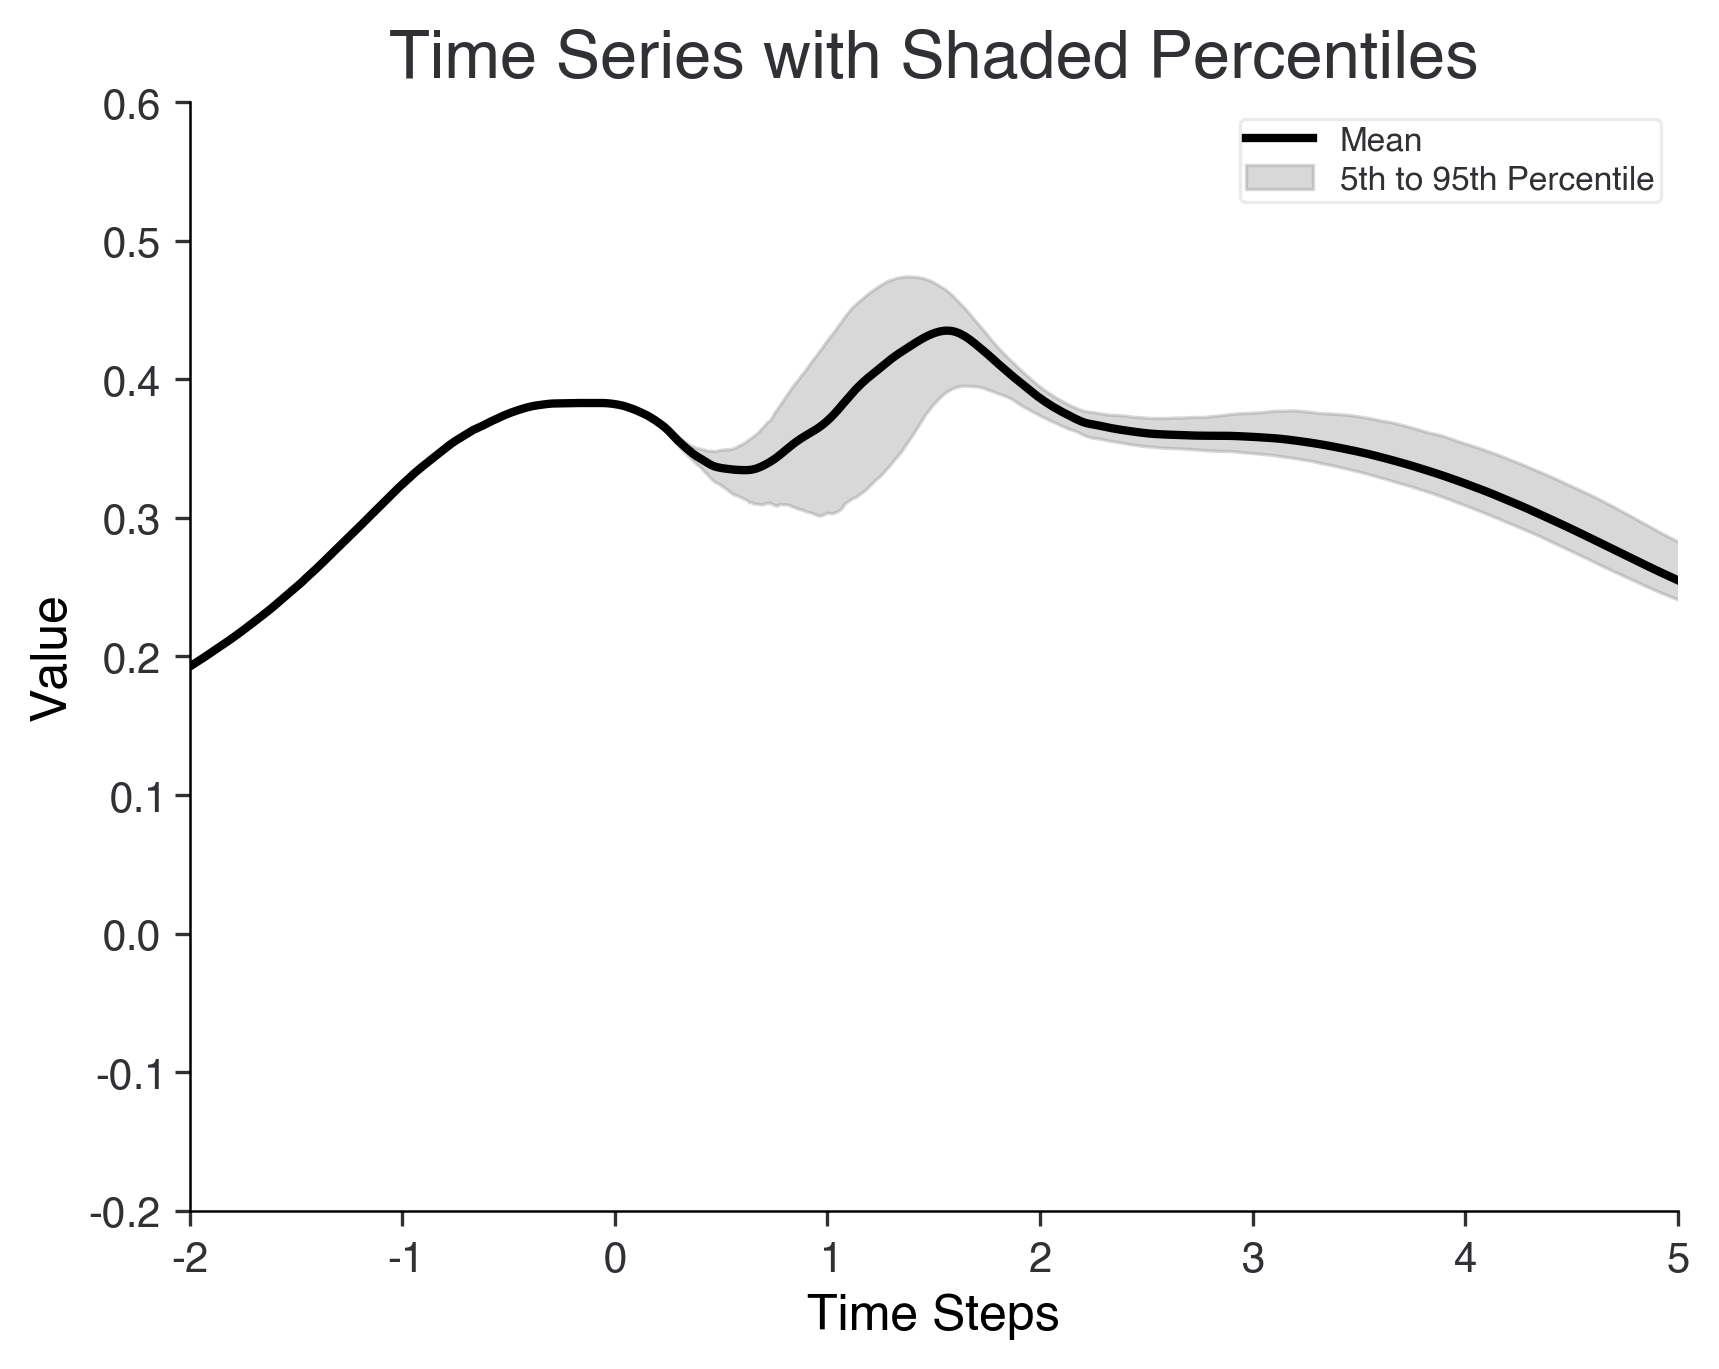

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with 300 time series (replace this with your actual data)
# Assuming the DataFrame has columns named 'TimeStep_1', 'TimeStep_2', ..., 'TimeStep_N'
# where N is the number of time steps in each time series.
# Rows represent different time series.
# df = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(300, 100)))

# Calculate the mean, 5th, and 95th percentiles
mean_values = w.mean(axis=1)
percentile_5 = w.quantile(0.05, axis=1)
percentile_95 = w.quantile(0.95, axis=1)

# Create the plot
plt.figure()

# Plot the mean as a dark line
plt.plot(w.index, mean_values, color='black', linewidth=2, label='Mean')

# Create a shaded region between the 5th and 95th percentiles
plt.fill_between(w.index, percentile_5, percentile_95, alpha=0.3, color='gray', label='5th to 95th Percentile')

# Customize the plot
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Time Series with Shaded Percentiles')
plt.legend()
plt.xlim(-2,5)

# Show the plot
plt.show()


In [70]:
w.columns

Index(['w_0480_6', 'w_0171_6', 'w_0072_6', 'w_0134_6', 'w_0079_6', 'w_0393_6',
       'w_0015_6', 'w_0218_6', 'w_0046_6', 'w_0309_6',
       ...
       'w0038_1.5', 'w0036_1.0', 'w_0452_6', 'w_0509_6', 'w_0203_6',
       'w_0346_6', 'w_0228_6', 'w_0327_6', 'w_0499_6', 'w_0283_6'],
      dtype='object', length=297)